In [1]:
# import modules needed for this assignment
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_article_contents(news_stations=[]):
    """
    This method gets the contents of multiple news articles regarding the murder of Jamal Khashoggi. The article
    names were nicely made before hand, making them easy to grab now. Specifically, each article is titled
    '{news-station}-khashoggi.txt', meaning we can easily access the with just a list of news orgaizations.
    ----------------------------
    Arguments:
        news_stations (list): a list of news orgs with articles about Khashoggi (Aljazeera,BBC,Breitbart,CNN,Fox)
    Returns:
        contents (list): a list of each article's contents (one for each news org), the content is unedited
    """
    contents = [] # empty list to store content of different news stories
    for station in news_stations: # loop through each news org
        with open(f'Data/{station.lower()}-khashoggi.txt') as f: # get file name using news org name
            contents.append(f.read()) # add the text contents to the list
    return contents

In [3]:
def get_clean_stop_words():
    """
    This method reads in a list of stop words from stop_words.csv and preapres them for use later on. 
    Some of the stop words have apostrophes and such that our world list doesn't have, so we remove 
    those non-letters here.
    ----------------------------
    Arguments:
        None
    Returns:
        stop_words (list): a list of stop words with all non-letters removed
    """
    with open('Data/stop_words.csv', newline='') as f: # read stop words from csv
        reader = csv.reader(f)
        stops = list(reader) # convert stop words to list
    stop_words = reformat_tokenized_list(stops) # reformat stopwords to elimate non-letters and convert to lower case
    return stop_words

In [4]:
def reformat_tokenized_list(content_list=[]):
    """
    This combo method converts a list of words into a more user-friendly format. It calls the method 
    'remove_non_letters' to (you guessed it!) remove all the characters that are not letters. Then, 
    it converts the word to lower case and returns the final list of fixed words. This method gets
    called in two contexts, first for stop words and then for the contents of each article.
    ----------------------------
    Arguments:
        content_list (list): a list of unedited words from the content (article or stop words)
    Returns:
        word_list (list): the same list of words but now in lower case with all non-letters removed
    """
    word_list = [] # empty list to store words
    for word in content_list: # loop through list of words
        word = remove_non_letters(word) # remove characters that are not letters
        if word: # if there are any characters left (i.e. the word was not a number)
            word_list.append(word.lower()) # add to word list
    return word_list

In [5]:
def remove_non_letters(old_word=""):
    """
    This method takes a word (string) and removes all of the characters that are not letters.
    ----------------------------
    Arguments: 
        old_word (string): the word to remove non-letters from
    Returns: 
        new_word (string): the word with all of the non-letters removed
    """
    new_word = "" # create empty new word
    for letter in old_word: # loop through each character in the word 
        if letter.isalpha(): # isalpha returns true if the character is in the alphabet
            new_word = new_word + letter # if it's a letter, append back onto new_word
    return new_word

In [6]:
def remove_stop_words(word_list=[], stop_words=[]):
    """
    This method takes a list of words and remove all of the stop words that appear in the stop_words list.
    ----------------------------
    Arguments: 
        word_list (list): a list of many words including stop worlds like (I, to, and, the, he, etc.)
        stop_words (list): a list of words to remove that are common in regular use (see above list)
    Returns: 
        go_words (list): a list of word with all of the stop words removed (hence these are the 'go words')
    """
    go_words = [] # create empty list of 'go words' to return if they are not stop words
    for word in word_list: # loop through all words in list
        if word not in stop_words: # check if word is in the stop words
            go_words.append(word) # if not, add it to go words
    return go_words

In [7]:
def count_word_occurences(word_list=[]):
    """
    This methods takes a list of words and counts how many times each word appears in the list.
    ----------------------------
    Arguments:
        word_list (list): a list of words to count the occurences of
    Returns:
        word_dict (dict): a dictionary where with keys as words, and values as a single list element that 
            contains the total number of times that word appears in the given word_list. Words not in the
            word_list will not appear in the returned word_dict
    """
    word_dict = dict() # create empty dictionary to hold word occurences
    for word in word_list: # loop through words in word list
        if word in word_dict: # check if word is already in dictionary
            word_dict[word][0] += 1 # if it is, add one to the associated list
        else:
            word_dict[word] = [1] # if not, create a new key with a value of [1]
    return word_dict

In [8]:
def analyze_single_article(contents="", stop_words=[]):
    """
    This combo method combines all of the needed methods for analyzing a single news article. It splits
    the content into a word list, then removes stop words, creates a dictionary of word occurences, and
    finally converts it into a document_term_matrix.
    ----------------------------
    Arguments:
        contents (string): the text content of a news article, as one string with no breaks
        stop_words (list): a list of stop words for removal, list has already been curated via 'get_clean_stop_words'
    Returns:
        dtm (dataframe): a document term matrix for the given article, with all stop words removed
    """
    word_list = reformat_tokenized_list(contents.split()) # reformat words to elimate non letters and convert case
    word_list = remove_stop_words(word_list, stop_words) # remove stop words from list
    word_dict = count_word_occurences(word_list) # create dictionary counting number of occurences per word
    dtm = pd.DataFrame(word_dict) # convert dictionary into document term matrix
    return dtm

In [9]:
def cosine_between_vectors(a=np.array([]),b=np.array([])):
    """
    This method calculates the cosine (angle) between two vectors, as demonstrated in class. Using the formula 
    from the law of cosines, this method calculates the 'how similar' two vectors are.
    ----------------------------
    Arguments:
        a,b (np.array): two numpy arrays to calculate the angle between (must be same length, duh)
    Returns:
        cosine: the angle between the two vectors, 1 = point in same direction, 0 = orthogonal
    """
    cosine = np.dot(a,b)/(np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b))) # cosine formula using dot products
    return cosine

In [10]:
def get_combined_document_term_matrix(contents=[], stop_words=[]):
    """
    This combo method analyzes each news article via 'analyze_single_article', then combines the resulting
    document term matrices into one matrix, for easy plotting. 
    ----------------------------
    Arguments:
        contents (list): a list of strings, each containing the entire text of one of the news articles
        stop_words (list): a list of stop words for removal, list has already been curated via 'get_clean_stop_words'
    Returns:
        combined_dtm (dataframe): one df containg the DTMs for each article as seperate rows
    """
    combined_dtm = pd.DataFrame() # create empty dataframe to hold all document term matricies
    for article in contents: # loop through each article
        dtm = analyze_single_article(article, stop_words) # analyze an entire article, returns document term matrix
        combined_dtm = combined_dtm.append(dtm,ignore_index=True,sort=True) # combine new dtm with others 
    combined_dtm.fillna(0, inplace=True) # replace NA with zeros (if a term is in one dtm but not another)
    return combined_dtm

In [11]:
def create_heat_map_array(combined_dtm=pd.DataFrame()):
    """
    This method converts the combined document term matrix into a 5x5 numpy array, where each cell is the
    cosine between the two news articles being compared. This matrix shows the similarity of each news
    article when considered as a vector.
    ----------------------------
    Arguments:
        combined_dtm (dataframe): combined_dtm from the previous method, each row describes one article
    Returns:
        arr: (np array): numpy array showing the similarity between the articles on the x and y axis (by index)
    """
    arr = np.zeros((5,5)) # initialize array to hold cosine values (angle between vectors)
    for i in range(0,5): # loop through all possible combos of news stories (5 choose 2)
        for ii in range(0,5):
            # calculate the angle using cosine dot product formula and round to 2 decimal places
            arr[i][ii] = cosine_between_vectors(combined_dtm.iloc[i].values, combined_dtm.iloc[ii].values).round(2)
    return arr

In [12]:
def create_heat_map_figure(arr=np.array([]), news_stations=[]):
    """
    This method produces the heatmap visual for the combined document term matrix created previously.
    ----------------------------
    Arguments:
        arr (np array): the numpy array created in 'create_heat_map_array' showing similarties between news articles
        news_stations (list): list of news stations used for labeling the axis
    """
    # create figure and heatmap base parts
    fig, ax = plt.subplots()
    im = ax.imshow(arr)

    # set figure size
    fig.set_size_inches(5,5) 

    # show ticks for each pair of news stories
    ax.set_xticks(np.arange(5))
    ax.set_yticks(np.arange(5))
    
    # set tick labels to be the news organizations
    ax.set_xticklabels(news_stations, fontsize=15)
    ax.set_yticklabels(news_stations, fontsize=15)

    # rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # loop over each element in array, creating data label for each heat map sqaure
    for i in range(5):
        for j in range(5):
            text = ax.text(j, i, arr[i, j], ha="center", va="center", color="w")

    # set title of heat map
    ax.set_title("Khashoggi News Story\n Similarities by Network\n", fontsize=18, fontweight='bold')
    
    # format heat map layout
    fig.tight_layout()
    
    # show heatmap
    plt.show()

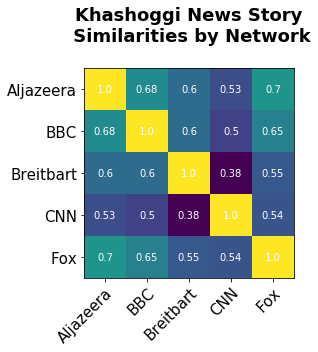

In [13]:
# list of news stations to analyze
news_stations = ['Aljazeera','BBC','Breitbart','CNN','Fox']

# get article contents from saved news stories in folder
contents = get_article_contents(news_stations)

# clean and reformat the list of stop words to eliminate
stop_words = get_clean_stop_words()

# create combined document term matrix used to make heat map
df = get_combined_document_term_matrix(contents, stop_words)

# create the heat map array showing similarities between each pair of news stories
arr = create_heat_map_array(df)

# display heat map
create_heat_map_figure(arr, news_stations)

### Note: I show only the analysis where the stop words are eliminated, but including them would be trivial. I only included the one figure because analyzing with the stop words is more than a little bit futile

# Discussion

When considering the similarities between the Khashoggi stories printed by different news networks, several things pop out at me. The first is that the diagonal is all 1's, this is a good sanity check because, of course, each news story is identical to itself. The second thing I notice is the lowest score, 0.38, between Breitbart and CNN. This sticks out because it is significantly lower than other combos of news networks. This makes sense based on my outside knowledge since CNN and Breitbart operate on very different ends of the political spectrum. However, this knowledge does not help to explain the relationship between other pairs of news networks. For example, Fox and Breitbart have one of the lower similarities despite having relatively similar viewer bases. Overall, analyzing more articles would certainly help to clarify these scores, since one article is a very small sample size. If we had chosen to include stop words in this analysis, we would find that all the scores go up significantly since (I imagine) there is no significant difference between which networks use the most "the" and "a" in their stories. When I performed this analysis with stop words, I found exactly this, the discrepancies between networks still existed but the gap was much smaller.